In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('./kc-house-data (1).csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### Условие 1: Задача 1
#### Постройте график
#### Назовите график
#### Сделайте именование оси x и оси y
#### Сделайте выводы

#### 1.2. Изучите стоимость недвижимости
#### Вывод - стоимость наибольшего количества домов лежит в диапазоне до 1 млн

In [ ]:
df['price'].min(), df['price'].max()

(75000.0, 7700000.0)

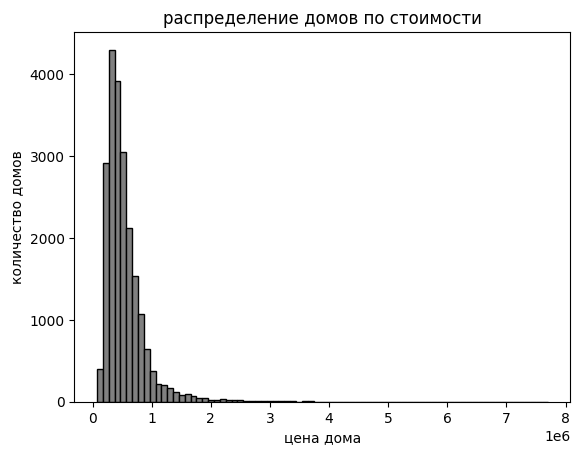

In [ ]:
plt.hist(df['price'], color = 'grey', edgecolor = 'black', bins = int(7700000/100000))
plt.xlabel('цена дома')
plt.ylabel('количество домов')
plt.title('распределение домов по стоимости');

#### 1.3. Изучите распределение квадратуры жилой
#### Выводы - наибольшее количество домов имеет площадь до 4000 кв.фут., медианное значение жилой площади около 2000 кв.фут.

In [ ]:
df['sqft_living'].min(), df['sqft_living'].max()

(290, 13540)

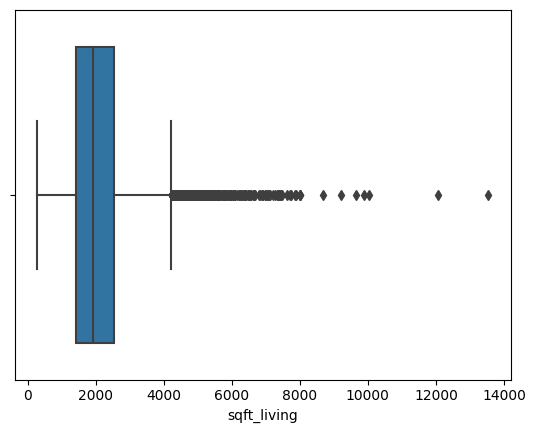

In [ ]:
sns.boxplot(x=df['sqft_living']);

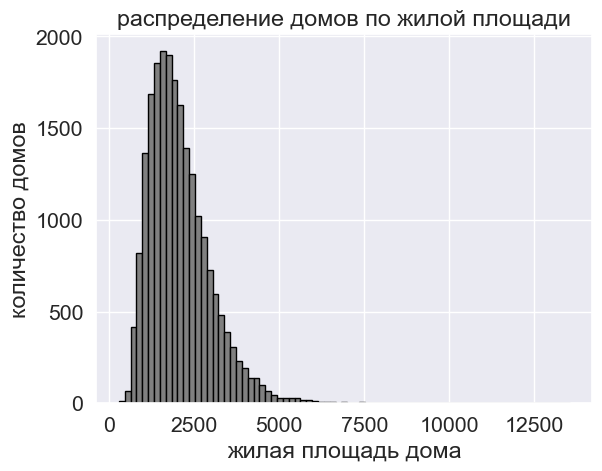

In [23]:
plt.hist(df['sqft_living'], color = 'grey', edgecolor = 'black', bins = int(7700000/100000))
plt.xlabel('жилая площадь дома')
plt.ylabel('количество домов')
plt.title('распределение домов по жилой площади');

#### 1.4. Изучите распределение года постройки
#### Выводы - большинство домов построены в период с 1950 по 1998 года, медианное значение года постройки 1975, максимальное количество домов построено в период с 2000 по 2005 год

In [ ]:
df['yr_built'].min(), df['yr_built'].max()

(1900, 2015)

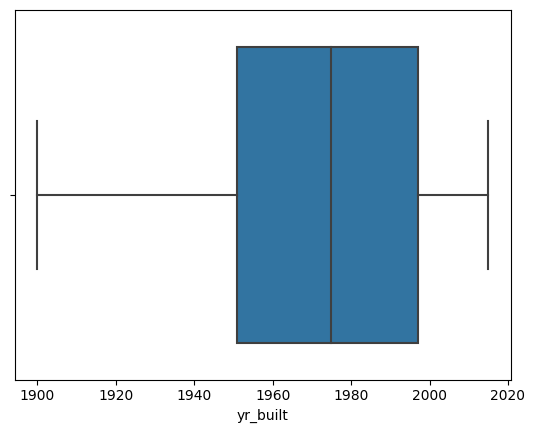

In [ ]:
sns.boxplot(x=df['yr_built']);

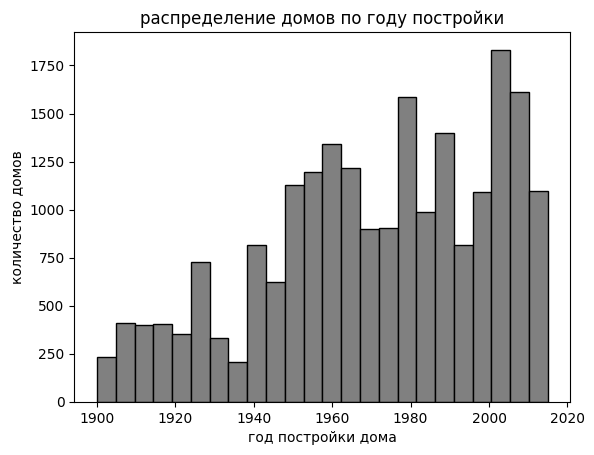

In [3]:
plt.hist(df['yr_built'], color = 'grey', edgecolor = 'black', bins = int(120/5))
plt.xlabel('год постройки дома')
plt.ylabel('количество домов')
plt.title('распределение домов по году постройки');

### Условие 2: 2 задача
#### 2.1. Изучите распределение домов от наличия вида на набережную
Постройте график

#### Сделайте выводы - **менее 1% домов имеют вид на набережную**

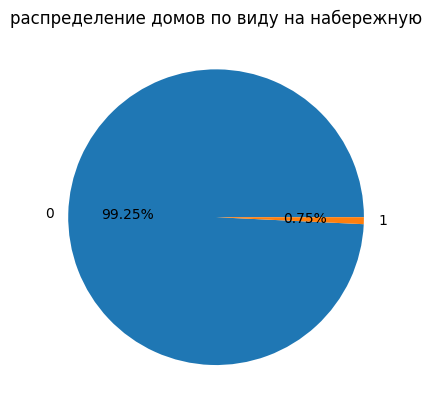

In [ ]:
df1 = df['waterfront'].value_counts()
plt.pie(df1.values, labels=df1.index, autopct="%.2f%%")
plt.title('распределение домов по виду на набережную');

#### 2.2. Изучите распределение этажей домов
#### Вывод - **максимальное количество домов имеют 1 этаж, большинство домов имеют не более 2 этажей**

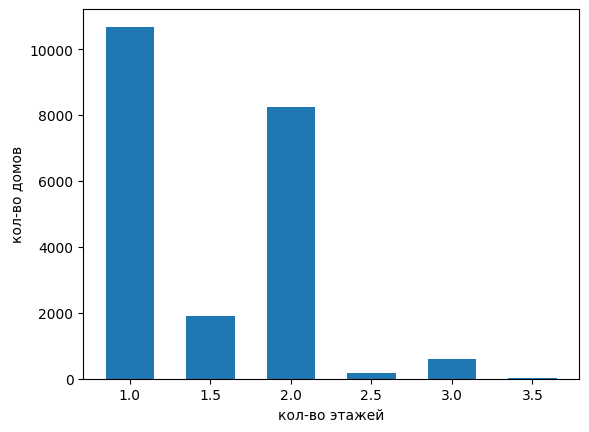

In [ ]:
df2 = df['floors'].value_counts()
plt.xlabel('кол-во этажей')
plt.ylabel('кол-во домов')
plt.bar(df2.index, df2.values, width=.3);

#### 2.3. Изучите распределение состояния домов
#### Выводы
* **почти 2/3 домов в среднем состоянии**
* **немного более 1/4 домов в хорошем состоянии**
* **почти 8% домов в отличном состоянии**
* **менее 1% домов в плохом и ужасном состоянии**

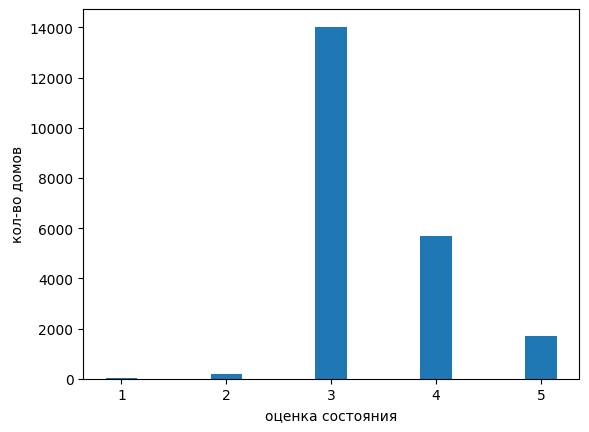

In [ ]:
df3 = df['condition'].value_counts()
plt.xlabel('оценка состояния')
plt.ylabel('кол-во домов')
plt.bar(df3.index, df3.values, width=.3);

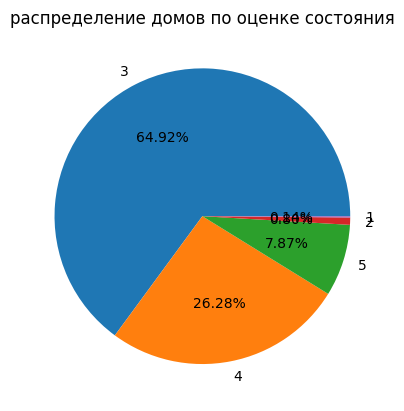

In [ ]:
df4 = df['condition'].value_counts()
plt.pie(df4.values, labels=df4.index, autopct="%.2f%%")
plt.title('распределение домов по оценке состояния');

### Условие 3: 3 задача
#### Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.

In [18]:
df5=df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 'yr_built', 'yr_renovated']]
df5.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,yr_renovated
0,221900.0,3,1.00,1180,5650,1.0,3,7,1955,0
1,538000.0,3,2.25,2570,7242,2.0,3,7,1951,1991
2,180000.0,2,1.00,770,10000,1.0,3,6,1933,0
3,604000.0,4,3.00,1960,5000,1.0,5,7,1965,0
4,510000.0,3,2.00,1680,8080,1.0,3,8,1987,0


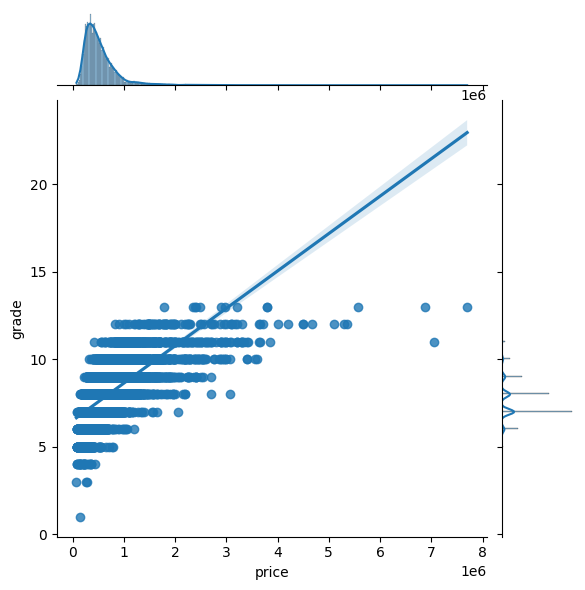

In [15]:
sns.jointplot(x=df['price'], y=df['grade'], kind='reg');

#### Наблюдается корелляция стоимости дома от его оценки

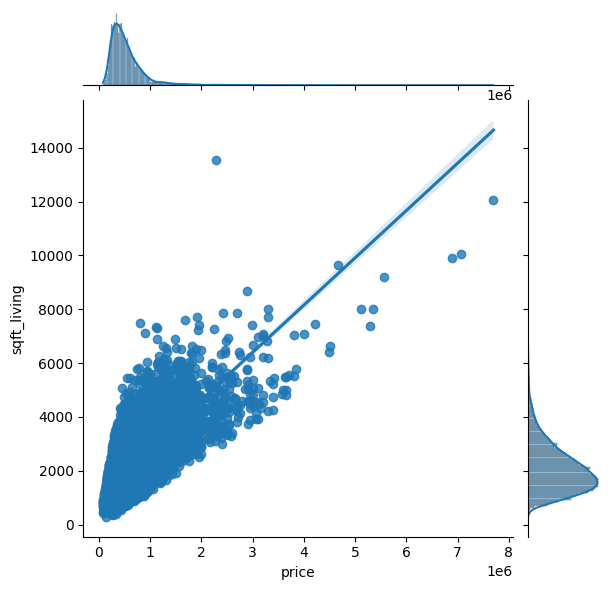

In [14]:
sns.jointplot(x=df['price'], y=df['sqft_living'], kind='reg');

#### Наблюдается зависимость стоимости дома от жилой площади

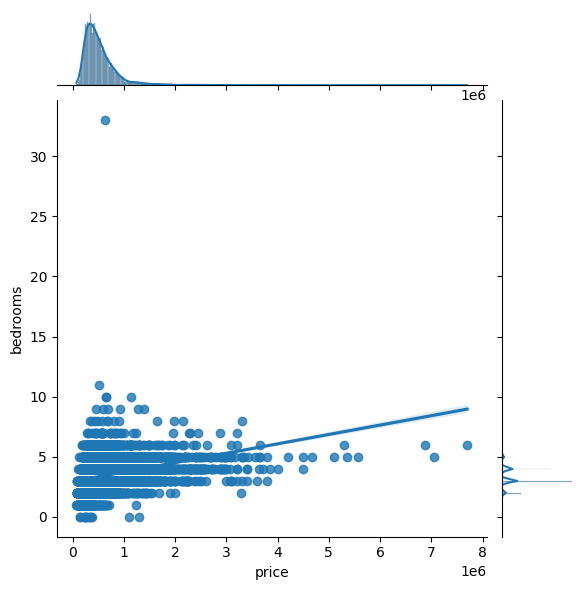

In [16]:
sns.jointplot(x=df['price'], y=df['bedrooms'], kind='reg');

#### зависимость стоимости дома от количества спален - не велика

In [19]:
corr_matrix = df5.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,yr_renovated
price,1.0,0.3,0.5,0.7,0.0,0.3,0.0,0.7,0.0,0.0
bedrooms,0.3,1.0,0.5,0.6,0.0,0.0,0.0,0.4,0.0,0.0
bathrooms,0.5,0.5,1.0,0.8,0.0,0.5,0.0,0.7,0.5,0.0
sqft_living,0.7,0.6,0.8,1.0,0.0,0.4,0.0,0.8,0.3,0.0
sqft_lot,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
floors,0.3,0.0,0.5,0.4,0.0,1.0,-0.3,0.5,0.5,0.0
condition,0.0,0.0,0.0,0.0,0.0,-0.3,1.0,0.0,-0.4,0.0
grade,0.7,0.4,0.7,0.8,0.0,0.5,0.0,1.0,0.4,0.0
yr_built,0.0,0.0,0.5,0.3,0.0,0.5,-0.4,0.4,1.0,0.0
yr_renovated,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


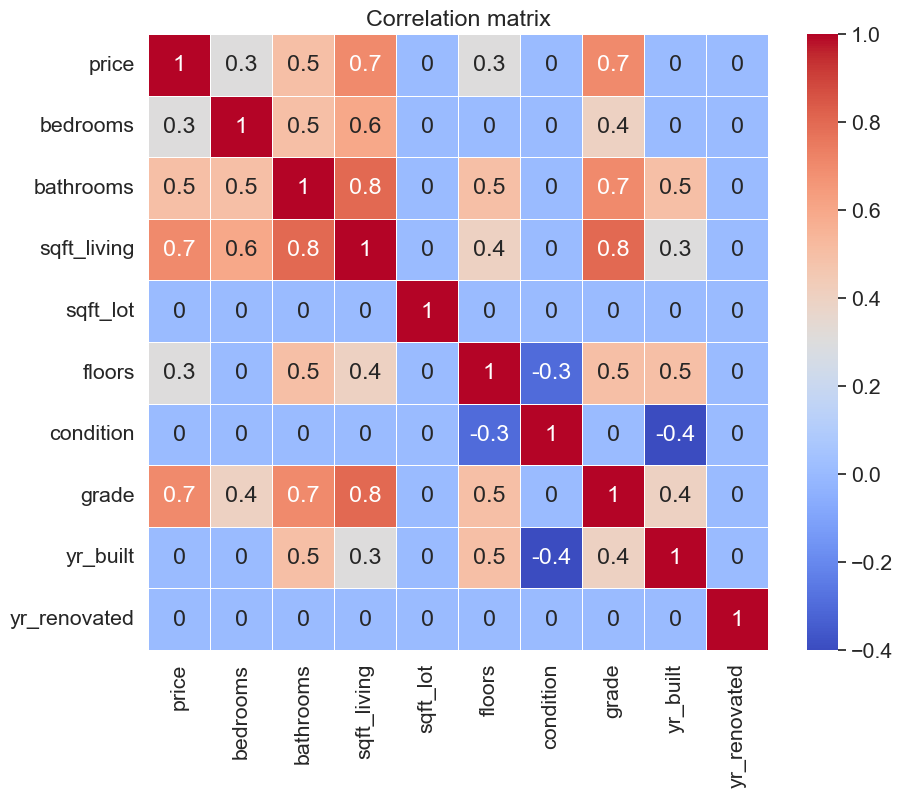

In [20]:
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.4)
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')
plt.title('Correlation matrix');

### Выводы на основании матрицы корреляций:
* наблюдается сильная зависимость стоимости дома от жилой площади и оценки состояния дома
* наблюдается средняя зависимость стоимости дома от количества ванных. При этом зависимость стоимости от количества спален слабая

In [ ]:
plt.hist()